In [ ]:
from google.colab import files
uploaded= files.upload()

Saving myfile.tsv to myfile (3).tsv


In [ ]:
import numpy as np
import pandas as pd
data = pd.read_csv('myfile.tsv', delimiter='\t', quoting=3)
data.shape
data.columns
data.head()
data.info

<bound method DataFrame.info of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

In [ ]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
corpus = []
for i in range (0,1000):

  review = re.sub(pattern='[^a-zA-Z]', repl='', string=data['Review'][i])

  review = review.lower()

  review_words = review.split()

  review_words = [word for word in review_words if not word in set (stopwords.words('english'))]

  ps = PorterStemmer()
  review = [ps.stem(word) for word in review_words]

  review = ''.join(review)

  corpus.append(review)


  corpus[:1500]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
x = cv.fit_transform(corpus).toarray()
y = data.iloc[:, 1].values


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 995), (200, 995), (800,), (200,))

In [ ]:
from sklearn.naive_bayes import MultinomialNB

Classifier = MultinomialNB()
Classifier.fit(x_train, y_train)

MultinomialNB()

In [ ]:
y_pred = Classifier.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0])

In [ ]:
from sklearn.metrics import accuracy_score

from sklearn.metrics import precision_score

from sklearn.metrics import recall_score

score1 = accuracy_score (y_test, y_pred)

score2 = precision_score (y_test, y_pred)

score3 = recall_score (y_test, y_pred)

print("-----Scores-----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}%".format(round(score2*100,2)))
print("Recall score is: {}%".format(round(score3*100,2)))


-----Scores-----
Accuracy score is: 89.5%
Precision score is: 100.0%
Recall score is: 78.35%


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

cm

array([[103,   0],
       [ 21,  76]])

Text(95.72222222222221, 0.5, 'Actual values')

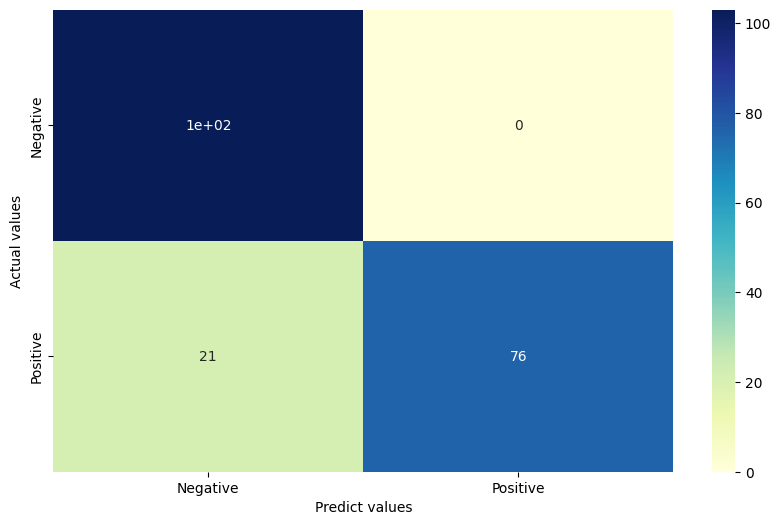

In [ ]:
from ast import increment_lineno
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

plt.xlabel('Predict values')
plt.ylabel('Actual values')


In [ ]:
from scipy.stats import multinomial
best_accuracy = 0.0

alpha_val = 0.0

for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(x_train, y_train)
  temp_y_pred = temp_classifier.predict(x_test)
  score = accuracy_score(y_test, temp_y_pred)

  print("Accuracy Score for alpha ={} is:{}%".format(round(i,1),round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i

print("the best accuracy is {}% with alpha value as {}".format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy Score for alpha =0.1 is:49.0%
Accuracy Score for alpha =0.2 is:49.0%
Accuracy Score for alpha =0.3 is:49.0%
Accuracy Score for alpha =0.4 is:49.0%
Accuracy Score for alpha =0.5 is:49.0%
Accuracy Score for alpha =0.6 is:49.0%
Accuracy Score for alpha =0.7 is:49.0%
Accuracy Score for alpha =0.8 is:49.0%
Accuracy Score for alpha =0.9 is:49.0%
Accuracy Score for alpha =1.0 is:49.0%
the best accuracy is 49.0% with alpha value as 0.1


In [ ]:
Classifier = MultinomialNB(alpha=0.1)
Classifier.fit(x_train, y_train)

MultinomialNB(alpha=0.1)

In [ ]:
def predict_sentiment (sample_review):

  sample_review = re.sub(pattern='[^a-zA-Z]', repl='', string = sample_review)

  sample_review = sample_review.lower()

  sample_review_words = sample_review.split()

  sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words("english"))]

  ps = PorterStemmer()

  final_review = [ps.stem(word) for word in sample_review_words]
  final_review = ''.join(final_review)

  temp =  cv.transform([final_review]).toarray()

  return Classifier.predict(temp)

In [ ]:
sample_review = 'The food, amazing.'

if predict_sentiment (sample_review):

  print('This is a POSITIVE review.')

else:
   print('This is a NEGATIVE review!')

This is a POSITIVE review.


In [ ]:
sample_review = 'There is not a deal good enough that would drag me into that establishment again.'

if predict_sentiment (sample_review):

  print('This is a POSITIVE review.')

else:
   print('This is a NEGATIVE review!')

This is a NEGATIVE review!
